## Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import warnings

## Step 2: Load and Explore the Dataset

In [4]:
data = pd.read_csv(r"C:\Users\AKHILK\Downloads\Breast Cancer METABRIC.csv")

In [5]:
# it will displays the 5 rows of data
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer_type_Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3Gene_classifier_subtype,Tumor Size,Tumor Stage,Patient Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [6]:
# rounding the age column
data["Age at Diagnosis"] = data["Age at Diagnosis"].astype(float).round()

In [7]:
# Displaying five rows
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer_type_Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3Gene_classifier_subtype,Tumor Size,Tumor Stage,Patient Vital Status
0,MB-0000,76.0,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.0,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,49.0,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,48.0,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,77.0,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [8]:
# shows the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer_type_Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

## Step 3: Exploratory Data Analysis (EDA) 

C:\Users\AKHILK\AppData\Local\Temp\ipykernel_9528\1466211610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Type of Breast Surgery'], palette='coolwarm')


Text(0.5, 1.0, 'Distribution of Breast Surgery')

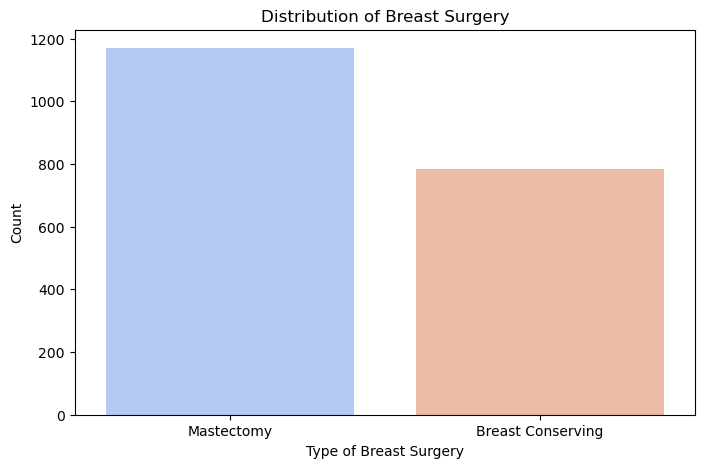

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['Type of Breast Surgery'], palette='coolwarm')

# Add labels and title
plt.xlabel("Type of Breast Surgery")
plt.ylabel("Count")
plt.title("Distribution of Breast Surgery")

C:\Users\AKHILK\AppData\Local\Temp\ipykernel_9528\2826546893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Cancer Type'], palette='coolwarm')


Text(0.5, 1.0, 'Distribution of Breast Cancer Types')

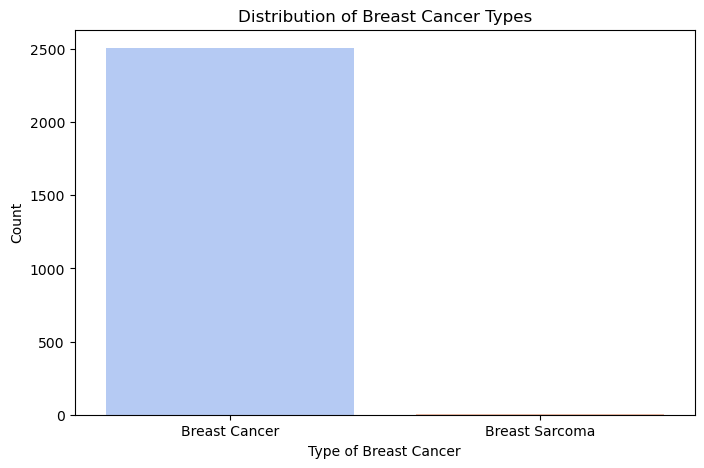

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['Cancer Type'], palette='coolwarm')

# Add labels and title
plt.xlabel("Type of Breast Cancer")
plt.ylabel("Count")
plt.title("Distribution of Breast Cancer Types")

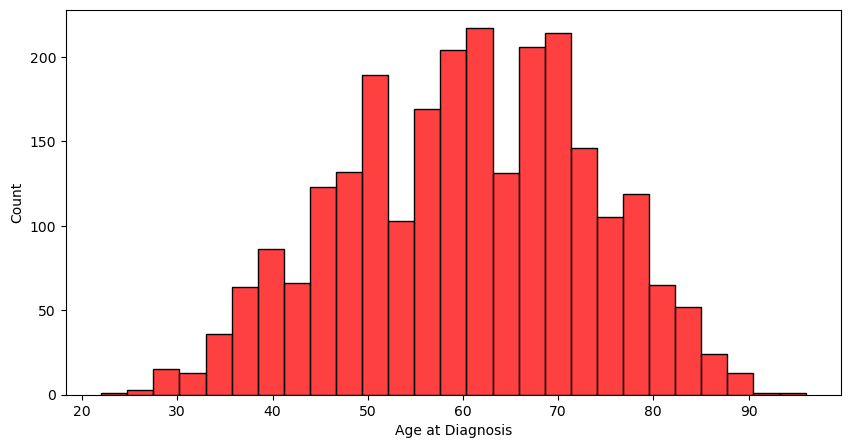

In [12]:
# visualizing Age at Diagnosis

plt.figure(figsize=(10, 5))
sns.histplot(data["Age at Diagnosis"], color= "red")
plt.show()

## Step 4: Data Preprocessing

In [14]:
# Check for missing values

print(data.isnull().sum())

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer_type_Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall_Survival_Months           528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [15]:
# Filling missing values
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].fillna(data[col].mode()[0])  # Fill categorical columns with mode
    else:
        data[col] = data[col].fillna(data[col].median())  # Fill numerical columns (including floats) with median


In [16]:
# Check for missing values

print(data.isnull().sum())

Patient ID                        0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer_type_Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall_Survival_Months           0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)

In [17]:
#summarizes the statistical properties

data.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall_Survival_Months,Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000
mean,60.419291,2.900757,2.440415,1.743723,5.543643,4.030133,123.397090,108.372401,25.993826,1.795935
std,13.000903,1.957919,0.645912,3.845927,3.848324,1.135254,67.721705,74.680028,14.934485,0.568132
min,22.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,51.000000,1.000000,2.000000,0.000000,3.000000,3.052000,76.233333,42.600000,18.000000,1.000000
50%,61.000000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.036000,164.333333,163.190000,30.000000,2.000000
max,96.000000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


In [18]:
# Check for duplicate rows
print(data.duplicated().sum())

0


In [19]:
# splitting numerical and categorical columns
num_cols = data.select_dtypes(include=['number']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [20]:
print(num_cols)
print(cat_cols)

Index(['Age at Diagnosis', 'Cohort', 'Neoplasm Histologic Grade',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Overall_Survival_Months',
       'Relapse Free Status (Months)', 'Tumor Size', 'Tumor Stage'],
      dtype='object')
Index(['Patient ID', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer_type_Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'ER status measured by IHC', 'ER Status',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Oncotree Code', 'Overall Survival Status',
       'PR Status', 'Radio Therapy', 'Relapse Free Status', 'Sex',
       '3Gene_classifier_subtype', 'Patient Vital Status'],
      dtype='object')


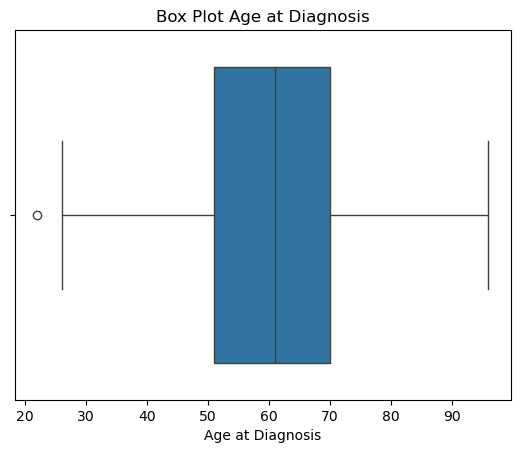

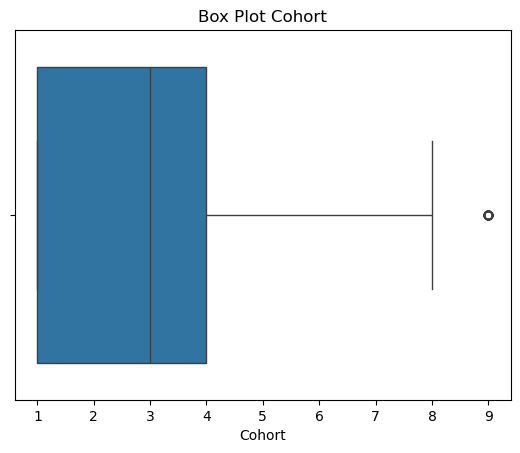

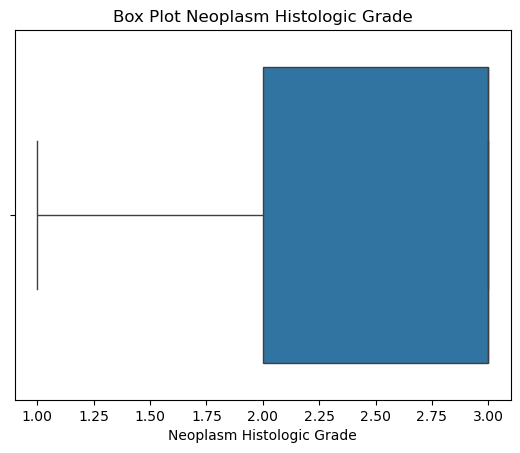

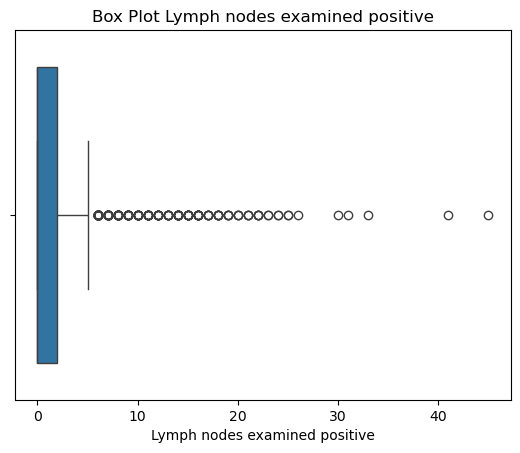

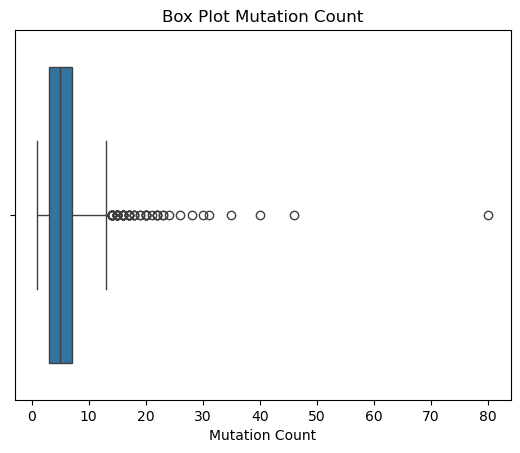

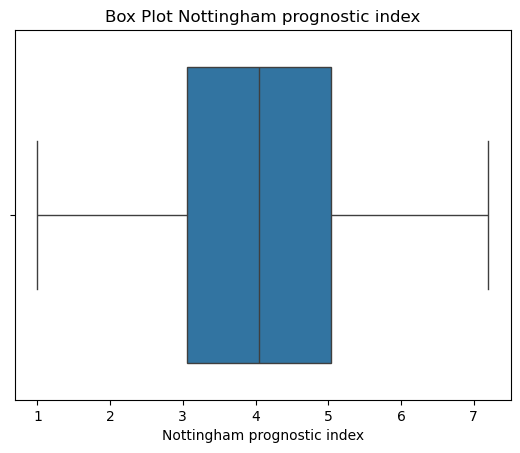

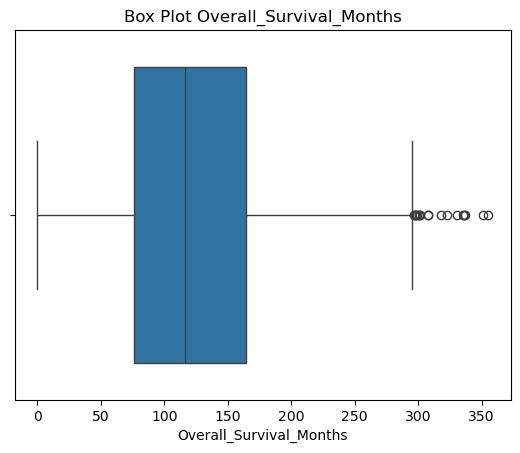

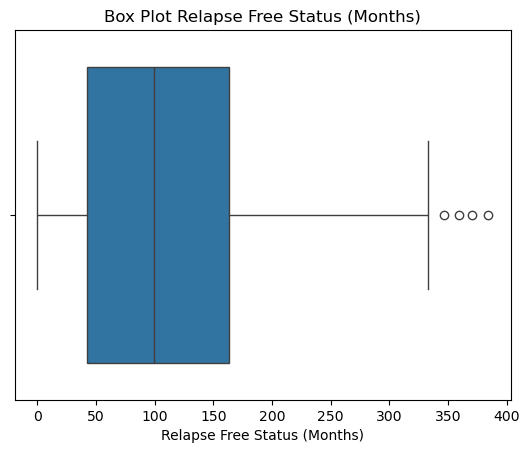

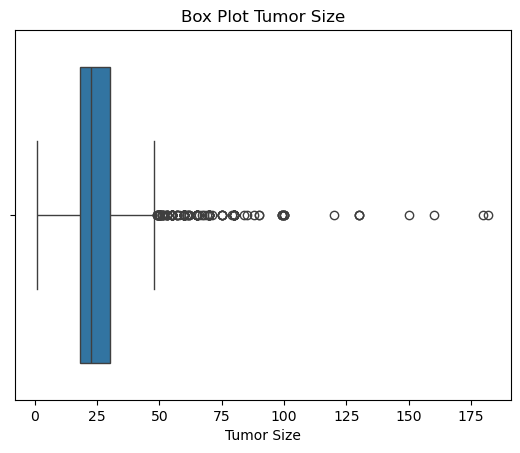

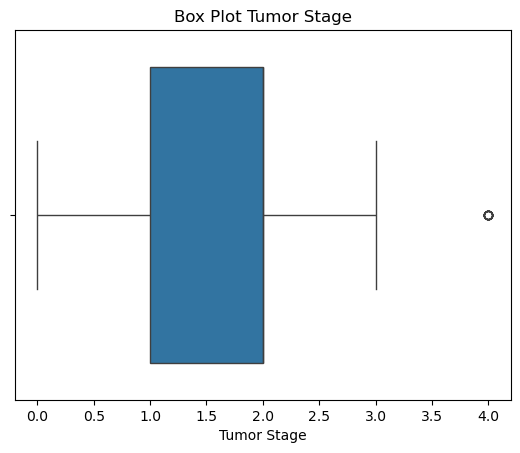

In [21]:
# finding outliers

for col in num_cols:
    sns.boxplot(data=data,x=col)
    plt.title("Box Plot " + col)
    plt.show()

In [22]:
for col in num_cols:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    data.loc[:,col]= np.clip(data[col],lower_bound,upper_bound)

In [23]:
 # CONVERTING categorical columns to integers

label_encoder = LabelEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [24]:
##create a code of x and y split

# Define features (X) and target (y)
X = data.drop("Overall Survival Status", axis=1)
y = data["Overall Survival Status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
X.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer_type_Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall_Survival_Months', 'PR Status', 'Radio Therapy',
       'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex',
       '3Gene_classifier_subtype', 'Tumor Size', 'Tumor Stage',
       'Patient Vital Status'],
      dtype='object')

In [70]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Apply SVD for feature selection
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10)  # You can change number of components
X_reduced = svd.fit_transform(X_scaled)


In [74]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [76]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Random Forest with Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [77]:
models = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'SVM': y_pred_svm,
    'Random Forest (Tuned)': y_pred_rf
}

for name, pred in models.items():
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

--- Logistic Regression ---
Accuracy: 0.8366533864541833
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       342
           1       0.75      0.73      0.74       160

    accuracy                           0.84       502
   macro avg       0.81      0.81      0.81       502
weighted avg       0.84      0.84      0.84       502


--- Decision Tree ---
Accuracy: 0.7888446215139442
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       342
           1       0.66      0.71      0.68       160

    accuracy                           0.79       502
   macro avg       0.76      0.77      0.76       502
weighted avg       0.79      0.79      0.79       502


--- SVM ---
Accuracy: 0.8685258964143426
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       342
           1       0.79      0.81      0.80       160

    accuracy                   

In [31]:
best_rf = rf.best_estimator_
importances = best_rf.feature_importances_
feature_names = X.columns

# Get top 5 features
top_indices = np.argsort(importances)[::-1][:10]

print("Top 5 Most Important Features (Random Forest):\n")
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

Top 5 Most Important Features (Random Forest):

Age at Diagnosis: 0.3155
Cancer_type_Detailed: 0.1337
Cancer Type: 0.0913
Type of Breast Surgery: 0.0888
Cohort: 0.0777
Cellularity: 0.0761
Patient ID: 0.0648
Chemotherapy: 0.0515
Pam50 + Claudin-low subtype: 0.0505
ER status measured by IHC: 0.0501
